# Project owner: Happy Mekiah
**Project description**

Ecommerce is a leading online shopping destination, offering a wide variety of products and services to customers across the globe. To maintain its competitive edge and ensure continued growth, It prioritizes a deep understanding of its customers and their behavior.
It thrives on understanding and catering to diverse customer needs and behaviors. This project aims to leverage customer behavior data on the website (including demographics, browsing habits, and purchase history) to gain valuable insights and address key problems impacting business performance. This can unlock valuable insights that drive business growth and create a more personalized and positive customer experience.The aim is to Visualize and analyze the data to understand its characteristics, identify patterns, and uncover potential relationships between variables.

In [ ]:
#Import all the necessary libraries
import pandas as pd
#these are libraris that you import to begin any tak
import matplotlib.pyplot as plt
import nltk
import numpy as np
import scipy
#import scikit.learn
import seaborn as sns
#!pip3 install Pillow
import plotly
import plotly.express as px
!pip install plotly_express
import plotly.express as go
!pip install plotly.subplots
from plotly.subplots import make_subplots


All the necessary libraries have been imported

In [ ]:
#load the dataset
import pandas as pd
ecommerce = pd.read_csv('/content/ecommerce_customer_data.csv')


The ecommerce dataset has been uploaded

**Exploratory Data Analysis:**
The purpose of Exploratory data analysis is to describe the key characteristics of each variable, Identify missing values, outliers, and inconsistencies. Explore relationships between variables through various visualizations (scatter plots, histograms and boxplots).

In [ ]:
ecommerce.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


The code above shows the first five columns, now lets check if there are any missing values before going any further

In [ ]:
ecommerce.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

Therea are no missing values in the data set, now lets look at the descriptive statistics

In [ ]:
ecommerce.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


The above table shows statistics for numerical data, now lets have a look at the last 5 rows of the data set

In [ ]:
ecommerce.tail()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
495,496,Male,24,Mumbai,Tablet,40,45,0,0
496,497,Female,24,Hyderabad,Desktop,8,34,4,5
497,498,Male,19,Pune,Desktop,33,41,0,3
498,499,Male,28,Chennai,Desktop,6,32,7,4
499,500,Female,31,Kolkata,Mobile,16,10,10,4


The above table shows the last rows , now lets explore the number of columns and rows in the dataset

In [ ]:
ecommerce

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2
...,...,...,...,...,...,...,...,...,...
495,496,Male,24,Mumbai,Tablet,40,45,0,0
496,497,Female,24,Hyderabad,Desktop,8,34,4,5
497,498,Male,19,Pune,Desktop,33,41,0,3
498,499,Male,28,Chennai,Desktop,6,32,7,4


In [ ]:
ecommerce.shape

(500, 9)

There are 500 rows and 9 coloumns in the ecommerce dataset, Now lets look at the summary of the DataFrame's structure and data types


In [ ]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


Lets look at the occurrences of each unique value within the selected column. I have decided to check the unique values in the Total_purchases column because it is my target variable.

In [ ]:
ecommerce["Total_Purchases"].value_counts()

0    99
2    89
5    84
3    83
4    80
1    65
Name: Total_Purchases, dtype: int64


Below Iam calculating the average total purchase amount for each location.



In [ ]:
ecommerce.groupby("Location")["Total_Purchases"].mean()

Location
Ahmedabad    2.451613
Bangalore    2.409836
Chennai      2.553571
Delhi        2.728571
Hyderabad    2.225806
Kolkata      2.676056
Mumbai       2.457627
Pune         2.135593
Name: Total_Purchases, dtype: float64

Now after calculating the average total purchase amount for each location, now lets look at device distribution to see the types of devices in the dataset

In [ ]:
#Device distribution
ecommerce = pd.read_csv('/content/ecommerce_customer_data.csv')
fig = px.histogram(ecommerce, x='Device_Type',
                   title='Device Distribution')
fig.show()

The number for mobile phones is higher with a count of 178, followed by tablets with a count of 163 and lastly desktops with close to 159, there is a slight difference between the number of these devices.Lets look at age distribution of customers

In [ ]:
#Age distribution of customers
# Histogram for 'Age'
fig = px.histogram(ecommerce, x='Age', title='Distribution of Age')
fig.show()

The customers here fall in a range between 18 and 35 with an unfair distribution, We have many customers within an age range of 21 with 36 people, followed by 29 with 35 people and the rest. Lets look at the relationship between total purchases and product browsing time to see if product browsing time by customers can have an impact in their pyrchasing decisions.

In [ ]:
#relationship between total purchases and product browsing time
figure = px.scatter(ecommerce,
                   x="Product_Browsing_Time",
                   y="Total_Purchases",
                   trendline="ols",
                   title="Relationship between Total Purchases and Product Browsing Time")
figure.show()


The straight line with a negative slope indicates an inverse relationship, where one variable increases as the other decreases.It shows that there is a negative relationship between product browsing time and total purchases, which means browsing time does not impact purchasing decisions of customers. lets look at the numerical features in ecommerce dataset


Text(0.5, 1.0, 'Items added to cart')

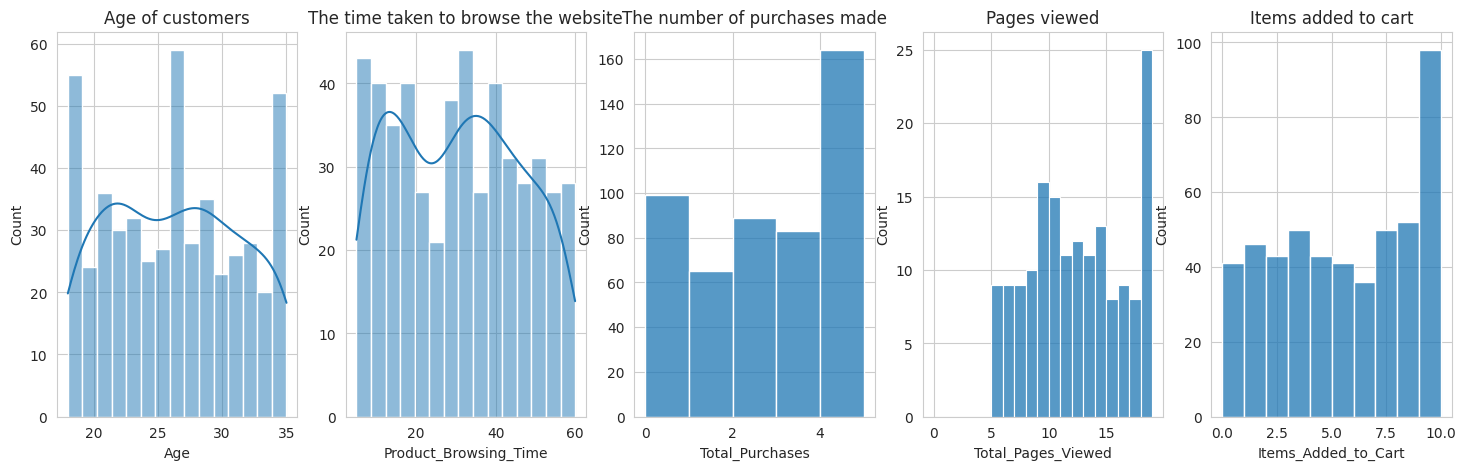

In [ ]:
#the distribution of numerical features
#load the dataset
ecommerce = pd.read_csv('/content/ecommerce_customer_data.csv')
#Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical variables
fig, ax = plt.subplots(1, 5, figsize=(18, 5))

sns.histplot(ecommerce['Age'], kde=True, bins=15, ax=ax[0])
ax[0].set_title('Age of customers')

sns.histplot(ecommerce['Product_Browsing_Time'], kde=True, bins=15, ax=ax[1])
ax[1].set_title('The time taken to browse the website')

sns.histplot(ecommerce['Total_Purchases'], kde=False, bins=range(6), ax=ax[2])
ax[2].set_title('The number of purchases made')

sns.histplot(ecommerce['Total_Pages_Viewed'], kde=False, bins=range(20), ax=ax[3])
ax[3].set_title('Pages viewed')

sns.histplot(ecommerce['Items_Added_to_Cart'], ax=ax[4])
ax[4].set_title('Items added to cart')


Age of customer: It is not fairly distributed with an increase around the 17 years, 27 years and 35years . The pattern is cyclic
Time taken to browse: The pattern is also cyclic , increasing and decreasing in a repititive pattern . There is also a surge in towards the right
Total purchases:
Total pages viewed: The pattern is cyclic, then  a surge on the right lastly we saw a sudden increase.
Items added to cart, firstly we saw a circlic partten of increasing and decreasing and lastly we saw a rapid increase.

In [ ]:
#the relationship between product browsing time  by gender
#load the dataset
ecommerce = pd.read_csv('/content/ecommerce_customer_data.csv')

gender_grouped = ecommerce.groupby('Gender')['Product_Browsing_Time'].mean().reset_index()
gender_grouped.columns = ['Gender', 'Product_Browsing_Time'] #groups gender by browsing time
fig = px.bar(gender_grouped, x='Gender', y='Product_Browsing_Time',
             title='Product browsing time per Gender')
fig.show()

Females have a product browsing time of 31mins and more while males have a product browsing time of 30mins , which means females have high product browsing time than males. Lets Calculate average total purchases grouped by device type

In [ ]:
# Calculate average total purchases grouped by device type
device_purchased = ecommerce.groupby('Device_Type')['Total_Purchases'].sum().reset_index()

pie_chart = px.pie(device_purchased, values='Total_Purchases', names='Device_Type',
                   title='Total Purchases by Device Type',
                   hover_data=['Total_Purchases'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()


The desktops have a low purchase of 30.9% ,followed by the tablets with 32.5% and lastly the mobile phones which have a high purchase of 36.6%.

In [ ]:
# Relationship between distribution of locations by age.
fig = px.histogram(ecommerce, x='Location',
                  color='Age',  # Change color to 'Age' to group by age
                  title='Distribution of Locations by Age',
                  barmode='group',  # Add 'barmode' for stacked bars by age
                  histfunc='count',  # Use 'count' for frequency instead of sum
                  color_discrete_sequence=px.colors.sequential.RdBu)  # Adjust color sequence
fig.update_layout(
    xaxis_title="Location",
    yaxis_title="Count (by Age)",  # Update title accordingly
)
fig.show()


There are many customers aged 23 years old in New Delhi and Bangalore, there are also many customers aged 29 years old in Hyderabad, the rest of ages show an cylic relationship by increasing and decreasing repeteadly.

In [ ]:
#Total purchases by location
Location = ecommerce['Location'].value_counts().head(10)

fig = px.bar(
    Location,
    x=Location.value
    y=Location.index,
    orientation='h',
    labels={'x': 'Total_Purchases', 'y': 'Location'},
    title='Total Purchases by Location',
    range_y=(0, 5)  # This sets the y-axis range
)

fig.show()

The people in the Kolkata made Total purchases of 71 being the highest, followed by Delhi with total purchases of 71 and followed by Ahmedabad and Hyderabad with a total of 62 and Bangalore 61 and lastly Pune with 59 total purchases.  Lets check whether items added to cart has an influence on the purchasing decisions.

In [ ]:
#The relationship between items added to cart and total purchases
ecommerce = pd.read_csv('/content/ecommerce_customer_data.csv')

purchases_grouped = ecommerce.groupby('Items_Added_to_Cart')['Total_Purchases'].mean().reset_index()
purchases_grouped.columns = ['Items_Added_to_Cart', 'Total_Purchases'] #groups gender by browsing time
fig = px.bar(purchases_grouped, x='Items_Added_to_Cart', y='Total_Purchases',
             title='Total purchases by items added to Cart')
range_y=(0, 5),
fig.show()

I see a slight impact of items added to cart on purchasing decisions, because you would see 10 items added to cart and only two would be purchased, so in a nutshell items added to cart have less influence on purchasing decsions. Lets see how age and device type influence each other.

In [ ]:
#The relationship between device type by age
devices_grouped = ecommerce.groupby("Device_Type")["Age"].mean().reset_index()

# Create the line graph with appropriate customizations
fig = px.bar (
    devices_grouped,
    x="Device_Type",
    y="Age",
    title="Device type by Age group",

    range_y=(0, 35),  # Set an appropriate y-axis range if needed
)

# Display the line graph
fig.show()

I see a slight difference in the way devices are bought acoss different ages, the desktop was mostly bought around the age of 26, Mobile phone 26 years and lastly tablet around 25 years. It shows that people in the range of 25-26 years can buy either desktops, mobile phones and tablets.

In [ ]:
#The relationship between product browsing time and total pages viewed
ecommerce = pd.read_csv('/content/ecommerce_customer_data.csv')
#Create a scatter plot to visualize the relationship between product browsing time and items
fig = px.bar(ecommerce, x='Product_Browsing_Time',
              y='Total_Pages_Viewed', title='Product Browsing time by Total Pages Viewed')
fig.show()

The variables product browsing time and total pages viewed are less related because in some instances the higher browsing time means more pages viewed while in others the higher browsing time means less pages viewed.

In [ ]:
#The relationship between total purchases by total pages viewed
figure = px.bar(ecommerce, x=ecommerce["Total_Pages_Viewed"],
                y = ecommerce["Total_Purchases"],
                color = ecommerce["Total_Pages_Viewed"],
            title="Total purchases by total pages viewed")
figure.show()

In the above graph total pages viewed does not influence purchasing decisions on customers because there are instances whereby we see many pages viewed and the purchases are less and in some instances less pages were viewed and purchases were high.

In [ ]:
#Correlation matrix visualization of numeric variables
correlation_matrix = ecommerce[['Product_Browsing_Time', 'Total_Pages_Viewed', 'Age', 'Total_Purchases']].corr()
fig_corr = px.imshow(correlation_matrix, text_auto=True, title='Correlation Matrix')
fig_corr.show()

The correlation relationship highlighted in blue is a strong negative one as you can see the blue color with -0, the variables defined by a light blue color shows a weak or no correlation at all while the ones in the diagonal yellow color  filled with 1's shows that each variable is perfectly correlated with itself.

 **Conclusion**

This project has embarked on a journey into the depths of customer data, utilizing advanced analytics to unlock hidden patterns behavior. By delving into these insights, we've aimed to achieve:

**Deeper Customer Understanding:**

We've sought to move beyond demographics and preferences, uncovering the nuances that truly drive customer actions and decisions.
**Optimized E-commerce Performance:**

 Armed with these insights, we've aimed to personalize the shopping experience, tailoring it to individual needs and desires.
**Increased Customer Engagement**:

 By understanding what motivates and engages customers, we've worked to create a more compelling and interactive online journey.
**Boosted Conversion Rates**:

 By predicting behavior and anticipating needs, we've aimed to guide customers seamlessly towards successful purchases.

**Overall Business Success:**

 This project aspires to contribute to tangible growth by driving customer engagement, conversion, and loyalty.
